In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
from imageio import imread
from skimage.transform import resize
import math
from math import pi
import scipy.stats
from selenium import webdriver
import warnings

import matplotlib as mpl
from matplotlib import colors
import matplotlib.patches as patches
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import matplotlib.image as mpimg
import matplotlib.image as image
from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox
from matplotlib.projections import get_projection_class
import matplotlib.cm as cm

from mplsoccer import Pitch,VerticalPitch,FontManager,add_image

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
pdf = pd.read_csv("/work/scrayper/understats/datasets/epl/players_epl_14-15.csv")
# sdf = pd.read_csv("/work/scrayper/understats/datasets/epl/shots_epl_14-15.csv")
sdf = pd.read_csv("/work/scrayper/understats/datasets/la_liga/shots_la_liga_17-18.csv")

In [3]:
cou = sdf[sdf["player"].str.contains("Coutinho")]

In [4]:
figBackColor = "#131313"
axBackColor = "#131313"
textColor = "#eeeeee"
titleColor = "#D66B13"

## white ver
# figBackColor = "#F8F8FF"
# axBackColor = "#F8F8FF"
# textColor = "#111111"
# titleColor = "#02211A"

In [5]:
def media_cancha_vertical(ax=None, color='#9d6b53', lw=1.5, outer_lines=True):
    if ax is None:
        ax = plt.gca()

    area_grande = Rectangle((.204,1), 0.592, -0.165, linewidth=lw, color=color, fill=False)
    area_pequeña = Rectangle((0.352,1), 0.296, -0.05, linewidth=lw, color=color, fill=False)

    porteria = Rectangle((.44, 1), 0.12, 0.014, linewidth=lw, color=color, fill=False)
    arco_area = Arc((0.5,0.845), 0.2, 0.065, theta1=185, theta2=355, linewidth=lw, color=color)
    corner_1 = Arc((1, 1), 0.12, 0.048, theta1=180, theta2=270, linewidth=lw, color=color)
    corner_2 = Arc((0, 1), 0.12, 0.048, theta1=270, theta2=360, linewidth=lw, color=color)

    court_elements=[area_grande, area_pequeña, porteria, arco_area, corner_1, corner_2]

    if outer_lines:
        outer_lines = Rectangle((0,1), 0, -4, linewidth=lw, color=color, fill=False)
        outer_lines2 = Rectangle((1,1), 0, -4, linewidth=lw, color=color, fill=False)
        outer_lines3 = Rectangle((0,1), 1, 0, linewidth=lw, color=color, fill=False)
        
        court_elements.append(outer_lines)
        court_elements.append(outer_lines2)
        court_elements.append(outer_lines3)
        

    for element in court_elements:
        ax.add_patch(element)
    
        
    return ax



In [6]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
from mplsoccer import VerticalPitch,FontManager,add_image
from matplotlib.colors import LinearSegmentedColormap
from urllib.request import urlopen
from PIL import Image

from matplotlib.patches import Circle, Rectangle, Arc

Text(0.5, 1, 'Philippe Coutinho at Barcelona')

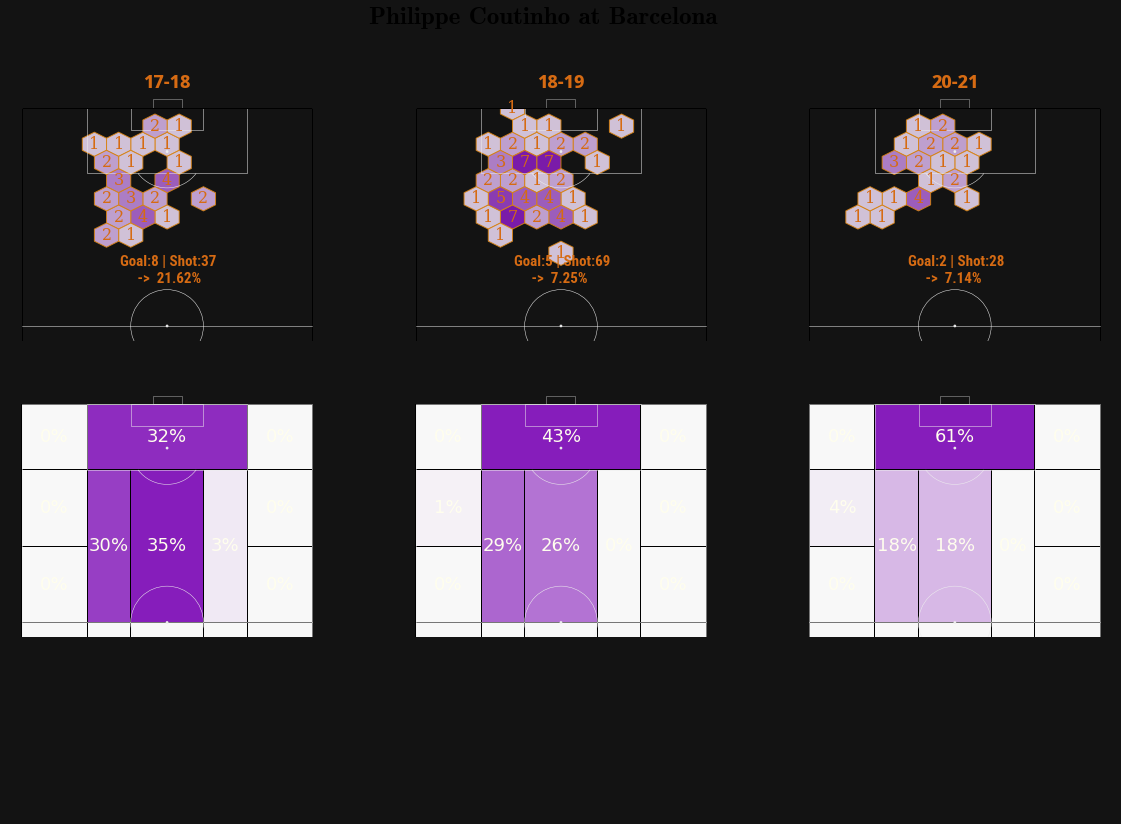

In [7]:
fig, axes = plt.subplots(2,3,figsize=(20,10),facecolor=figBackColor)

axes = axes.ravel()

pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    pitch_color=axBackColor,
    line_color=textColor, 
    figsize=(13.5,8),
    constrained_layout=True,
    tight_layout=False,
    line_zorder=1, 
    linewidth=0.5,
    half=True
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])
pitch.draw(ax=axes[2])
pitch.draw(ax=axes[3])
pitch.draw(ax=axes[4])
pitch.draw(ax=axes[5])

axes[0].invert_xaxis()
axes[1].invert_xaxis()
axes[2].invert_xaxis()
axes[3].invert_xaxis()
axes[4].invert_xaxis()
axes[5].invert_xaxis()


colors1 = ['#DCB7F9', '#B05CF1', '#9F38EE', '#8213D6']
n_bins = 50
cmap_name = 'my_list'
cm1 = LinearSegmentedColormap.from_list('my_list', colors1, N=n_bins)

pitch_color = '#f8f8f8'
text_color = '#fffeee'
oneColor = '#135ED6'
theOtherColor = '#861dbb'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)


seasons = [
#     "14-15",
#     "15-16",
#     "16-17",
    "17-18",
    "18-19",
#     "19-20",
    "20-21",
]

for idx,season in enumerate(seasons):
    
    sdf = pd.read_csv(f"/work/scrayper/understats/datasets/la_liga/shots_la_liga_{season}.csv")
    cou = sdf[sdf["player"].str.contains("Coutinho")]
    shots = len(cou)
    goals = len(cou[cou["result"]=="Goal"])
    per = round((goals / shots) * 100, 2)
    x = cou['X']*120
    y = cou['Y']*80


    h = pitch.hexbin(x,y, ax=axes[idx], cmap=cmapB, alpha=0.9, linewidth=1,
                     gridsize=(12,12), linewidths=0, mincnt=1, edgecolors='#D68213',
                     hatch='',vmin=0, vmax=6)
    counts = h.get_array()
    verts = h.get_offsets()

    for i in range(len(counts)):
        pitch.annotate(int(counts[i]), xy=(verts[i][1], verts[i][0]),ha="center",va="center",
                       size=16,ax=axes[idx],zorder=3,color=titleColor,fontname='serif')


    axes[idx].set_title(season, fontsize=18, color=titleColor, fontname='Noto sans', fontweight="bold")
    axes[idx].text(s=f'Goal:{goals} | Shot:{shots}\n     ->  {per}%',x=53, y=72, fontsize=15, color=titleColor, fontname='Roboto Condensed', fontweight="bold")

    
    bin_statistic2 = pitch.bin_statistic_positional(x, y, statistic='count',
                                               positional='full', normalize=True)

    pitch.heatmap_positional(bin_statistic2, ax=axes[idx+3],
                             cmap=cmapB, edgecolors='black',alpha=1, linewidth=.05)

    labels2 = pitch.label_heatmap(bin_statistic2, color=text_color, fontsize=18,
                                 ax=axes[idx+3], ha='center', va='center',
                                 str_format='{:.0%}')
    
    
fig.suptitle("Philippe Coutinho at Barcelona",y=1,fontsize=25,fontname="cmb10")

# plt.savefig(f'/work/output/report/cou_loc2.png', bbox_inches='tight', transparent=False, dpi=300)

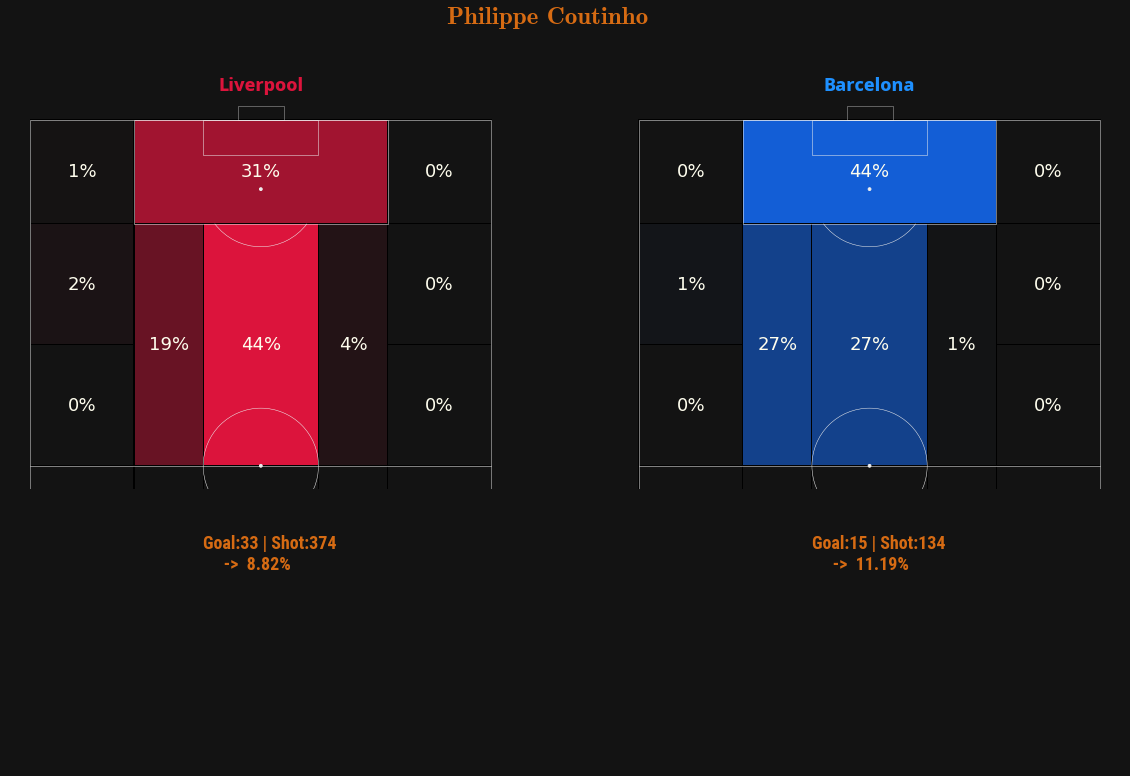

In [20]:
fig, axes = plt.subplots(1,2,figsize=(20,10),facecolor=figBackColor)

axes = axes.ravel()

pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    pitch_color=axBackColor,
    line_color=textColor, 
    figsize=(13.5,8),
    constrained_layout=True,
    tight_layout=False,
    line_zorder=1, 
    linewidth=0.5,
    half=True
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])


axes[0].invert_xaxis()
axes[1].invert_xaxis()


colors1 = ['#DCB7F9', '#B05CF1', '#9F38EE', '#8213D6']
n_bins = 50
cmap_name = 'my_list'
cm1 = LinearSegmentedColormap.from_list('my_list', colors1, N=n_bins)

pitch_color = '#131313'
text_color = '#fffeee'
oneColor = '#135ED6'
theOtherColor = 'crimson'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)


seasonsPre = [
    "14-15",
    "15-16",
    "16-17",
    "17-18"
]
seasonsLiga = [
    "17-18",
    "18-19",
#     "19-20",
    "20-21",
]


ligaDfs = []
for idx,season in enumerate(seasonsLiga):
    
    sdf = pd.read_csv(f"/work/scrayper/understats/datasets/la_liga/shots_la_liga_{season}.csv")
    ligaDfs.append(sdf)
ligaDf = pd.concat(ligaDfs)

preDfs = []
for idx,season in enumerate(seasonsPre):
    
    sdf = pd.read_csv(f"/work/scrayper/understats/datasets/epl/shots_epl_{season}.csv")
    preDfs.append(sdf)
preDf = pd.concat(preDfs)
    

def plotPositionalHeat(sdf,idx,cmap,textColor,teamName):
    
    cou = sdf[sdf["player"].str.contains("Coutinho")]
    shots = len(cou)
    goals = len(cou[cou["result"]=="Goal"])
    per = round((goals / shots) * 100, 2)
    x = cou['X']*120
    y = cou['Y']*80

#     h = pitch.hexbin(x,y, ax=axes[idx], cmap=cmapB, alpha=0.9, linewidth=1,
#                      gridsize=(12,12), linewidths=0, mincnt=1, edgecolors='#D68213',
#                      hatch='',vmin=0, vmax=6)
#     counts = h.get_array()
#     verts = h.get_offsets()

#     for i in range(len(counts)):
#         pitch.annotate(int(counts[i]), xy=(verts[i][1], verts[i][0]),ha="center",va="center",
#                        size=16,ax=axes[idx],zorder=3,color=titleColor,fontname='serif')


    axes[idx].set_title(teamName, fontsize=18, color=textColor, fontname='Noto sans', fontweight="bold")
#     axes[idx+1].set_title("Barcelona", fontsize=18, color="dodgerblue", fontname='Noto sans', fontweight="bold")
    
    axes[idx].text(s=f'Goal:{goals} | Shot:{shots}\n     ->  {per}%',x=50, y=42, fontsize=18, color=titleColor, fontname='Roboto Condensed', fontweight="bold")
#     axes[idx+1].text(s=f'Goal:{goals} | Shot:{shots}\n     ->  {per}%',x=50, y=42, fontsize=18, color=titleColor, fontname='Roboto Condensed', fontweight="bold")

    
    bin_statistic = pitch.bin_statistic_positional(x, y, statistic='count',
                                               positional='full', normalize=True)

    pitch.heatmap_positional(bin_statistic, ax=axes[idx],
                             cmap=cmap, edgecolors='black',alpha=1, linewidth=.05)

    labels = pitch.label_heatmap(bin_statistic, color=text_color, fontsize=18,
                                 ax=axes[idx], ha='center', va='center',
                                 str_format='{:.0%}')
    

# for idx,season in enumerate(seasonsPre):

#     sdf = pd.read_csv(f"/work/scrayper/understats/datasets/epl/shots_epl_{season}.csv")
#     cou = sdf[sdf["player"].str.contains("Coutinho")]
#     shots = len(cou)
#     goals = len(cou[cou["result"]=="Goal"])
#     per = round((goals / shots) * 100, 2)
#     x = cou['X']*120
#     y = cou['Y']*80
#     bin_statistic2 = pitch.bin_statistic_positional(x, y, statistic='count',
#                                                positional='full', normalize=True)

#     pitch.heatmap_positional(bin_statistic2, ax=axes[idx],
#                              cmap=cmapB, edgecolors='black',alpha=1, linewidth=.05)

#     labels2 = pitch.label_heatmap(bin_statistic2, color=textColor, fontsize=18,
#                                  ax=axes[idx], ha='center', va='center',
#                                  str_format='{:.0%}')
    
#     axes[idx].text(s=f'Goal:{goals} | Shot:{shots}\n     ->  {per}%',x=50, y=42, fontsize=18, color=titleColor, fontname='Roboto Condensed', fontweight="bold")
    
    
plotPositionalHeat(preDf,0,cmapB,"crimson","Liverpool")
plotPositionalHeat(ligaDf,1,cmapA,"dodgerblue","Barcelona")

fig.suptitle("Philippe Coutinho",y=.9,fontsize=25,fontname="cmb10",color="#D66B13")

# plt.savefig(f'/work/output/report/cou_locAll.png', bbox_inches='tight', transparent=True, dpi=300,facecolor='#131313')

In [16]:
preDf

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
0,37092.0,12.0,Goal,0.954,0.515,0.649436,Alfred Finnbogason,h,2655.0,OpenPlay,2014.0,RightFoot,5465.0,Real Sociedad,Levante,3.0,0.0,2015-05-01 19:45:00,Yuri,Pass
1,37094.0,30.0,MissedShots,0.803,0.788,0.051233,Esteban Granero,h,2240.0,DirectFreekick,2014.0,RightFoot,5465.0,Real Sociedad,Levante,3.0,0.0,2015-05-01 19:45:00,NaN,Standard
2,37097.0,42.0,MissedShots,0.691,0.328,0.011476,Zaldúa,h,2226.0,FromCorner,2014.0,RightFoot,5465.0,Real Sociedad,Levante,3.0,0.0,2015-05-01 19:45:00,NaN,None
3,37100.0,50.0,Goal,0.933,0.540,0.121035,Markel Bergara,h,2231.0,FromCorner,2014.0,Head,5465.0,Real Sociedad,Levante,3.0,0.0,2015-05-01 19:45:00,Rubén Pardo,Cross
4,37101.0,59.0,BlockedShot,0.709,0.684,0.013541,Yuri,h,2229.0,OpenPlay,2014.0,LeftFoot,5465.0,Real Sociedad,Levante,3.0,0.0,2015-05-01 19:45:00,Xabi Prieto,Interception
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9169,171285.0,56.0,SavedShot,0.671,0.322,0.007500,Joan Jordán,a,2122.0,OpenPlay,2017.0,RightFoot,8000.0,Alaves,Eibar,1.0,2.0,2017-11-25 12:00:00,Sergi Enrich,Chipped
9170,171286.0,58.0,BlockedShot,0.684,0.355,0.010796,Joan Jordán,a,2122.0,OpenPlay,2017.0,RightFoot,8000.0,Alaves,Eibar,1.0,2.0,2017-11-25 12:00:00,NaN,None
9171,171287.0,68.0,Goal,0.954,0.489,0.616352,Charles,a,2339.0,OpenPlay,2017.0,Head,8000.0,Alaves,Eibar,1.0,2.0,2017-11-25 12:00:00,Iván Alejo,Cross
9172,171288.0,74.0,SavedShot,0.704,0.791,0.027616,Joan Jordán,a,2122.0,DirectFreekick,2017.0,RightFoot,8000.0,Alaves,Eibar,1.0,2.0,2017-11-25 12:00:00,NaN,Standard


In [141]:
np.mean([103,111,106])

print(103 / 31)
print(111 / 22.2)
print(106 / 24.7)
(3.2+5+4.29)/3

3.3225806451612905
5.0
4.291497975708502


4.163333333333333

NameError: name 'df' is not defined

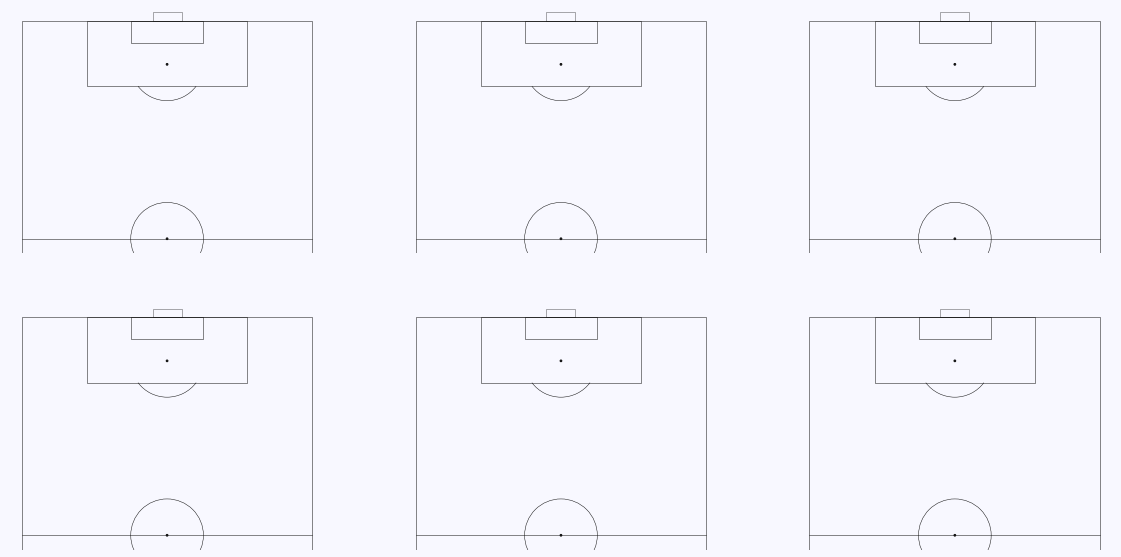

In [106]:
fig, axes = plt.subplots(2,3,figsize=(20,10),facecolor=figBackColor)
axes = axes.ravel()

pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    pitch_color=axBackColor,
    line_color=textColor, 
    figsize=(13.5,8),
    constrained_layout=True,
    tight_layout=False,
    line_zorder=1, 
    linewidth=0.5,
    half=True
)
pitch.draw(ax=axes[0])
pitch.draw(ax=axes[1])
pitch.draw(ax=axes[2])
pitch.draw(ax=axes[3])
pitch.draw(ax=axes[4])
pitch.draw(ax=axes[5])

axes[0].invert_xaxis()
axes[1].invert_xaxis()
axes[2].invert_xaxis()
axes[3].invert_xaxis()
axes[4].invert_xaxis()
axes[5].invert_xaxis()


colors1 = ['#DCB7F9', '#B05CF1', '#9F38EE', '#8213D6']
n_bins = 50
cmap_name = 'my_list'
cm1 = LinearSegmentedColormap.from_list('my_list', colors1, N=n_bins)

playerIds = {
#     11119:'Messi',
#     22221:'Suarez',
#     50835:'Neymar',
#     9486:'Iniesta',
#     80241:'Griezmann',
#     382234:'Ansu Fati',
#     80767:'Coutinho',
#     299513:'Dembele',
#     368409:'Trincão',
#     73494:'M.Braithwaite',
#     374869:"Carles Pérez",
#     22732:'Rakitic',
#     95953:'Paco',
#     25008:'Vidal',
#     36399:'Paulinho',
#     146780:'Malcom',
#     303268:'Alena',
#     68585:'L.Dejong',
#     115587:'Ocampos',
#     323547:'En-Nesyri',
#     102439:'Vázquez',
#     303729:'Acuna',
#     22546:'Papu',
#     362431:'Felix',
#     127604:'Ángel Correa',
#     254582:'Llorente',
#     132962:'Lemar',
#     115472:'Carrasco',
#     140090:'Dembele',
    14296:'Benzema',
    347862:'Rodrygo',
    337782:'Vinícius',
    31772:'Kroos',
    88526:'Casemiro',
    20874:'Modric'
    
}

for idx,(keyid,name) in enumerate(playerIds.items()):
    bdf = df[df['playerId']==keyid]
    shots = len(bdf)
    goals = len(bdf[bdf['isGoal']==True])
    per = round((goals / shots) * 100, 2)
    x = bdf['x']
    y = bdf['y'] 
    h = pitch.hexbin(x,y, ax=axes[idx], cmap=cm1, alpha=0.9, linewidth=1,
                     gridsize=(12,12), linewidths=0, mincnt=1, edgecolors='#D68213',
                     hatch='',vmin=0, vmax=6)
    counts = h.get_array()
    verts = h.get_offsets()

    for i in range(len(counts)):
        pitch.annotate(int(counts[i]), xy=(verts[i][1], verts[i][0]),ha="center",va="center",
                       size=16,ax=axes[idx],zorder=3,color=titleColor,fontname='serif')


    axes[idx].set_title(name, fontsize=18, color=titleColor, fontname='Noto sans', fontweight="bold")
    axes[idx].text(s=f'Goal:{goals} | Shot:{shots}\n     ->  {per}%',x=53, y=72, fontsize=15, color=titleColor, fontname='Roboto Condensed', fontweight="bold")


plt.text(222,220,f"{targetTeam.title()}'s Player Shot Locations in La Liga {targetYear}", fontsize=28, alpha=.9, color=titleColor,fontname='Roboto Condensed')
plt.text(290,50,"Data via Whoscored / Inspired by @jonollington Created by @Bucciratimes", color=textColor, fontsize=14, alpha=0.5)

# plt.savefig(f'/work/output/report/{targetTeam}{targetYear}_loc.png', bbox_inches='tight', transparent=True, dpi=500, facecolor='#131313')

In [76]:
pitch_color = '#f8f8f8'
text_color = '#fffeee'
oneColor = '#135ED6'
theOtherColor = '#BB1D3A'

cmap_color1 = oneColor
cmap_color2 = theOtherColor

cmapA = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color1], N=100)
cmapB = LinearSegmentedColormap.from_list("my_cmap", [pitch_color, cmap_color2], N=100)

#Loading Some Fonts
# URL = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Bold.ttf?raw=true'
# URL2 = 'https://github.com/googlefonts/robotoslab/blob/main/fonts/static/RobotoSlab-Light.ttf?raw=true'
# URL3 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-Italic.ttf?raw=true'
# URL4 = 'https://github.com/googlefonts/spacemono/blob/main/fonts/SpaceMono-BoldItalic.ttf?raw=true'
# URL5 = 'https://github.com/googlefonts/rubik/tree/main/fonts/ttf/Rubik-Medium.ttf?raw=true'

# font_regular = FontManager(URL2)
# font_regular2 = FontManager(URL3)
# font_regular3 = FontManager(URL5)


# font_bold = FontManager(URL)
# font_label = FontManager(URL)
# font_label2 = FontManager(URL4)

In [77]:
figBackColor = "#F8F8FF"
axBackColor = "#F8F8FF"
textColor = "#111111"
titleColor = "#02211A"

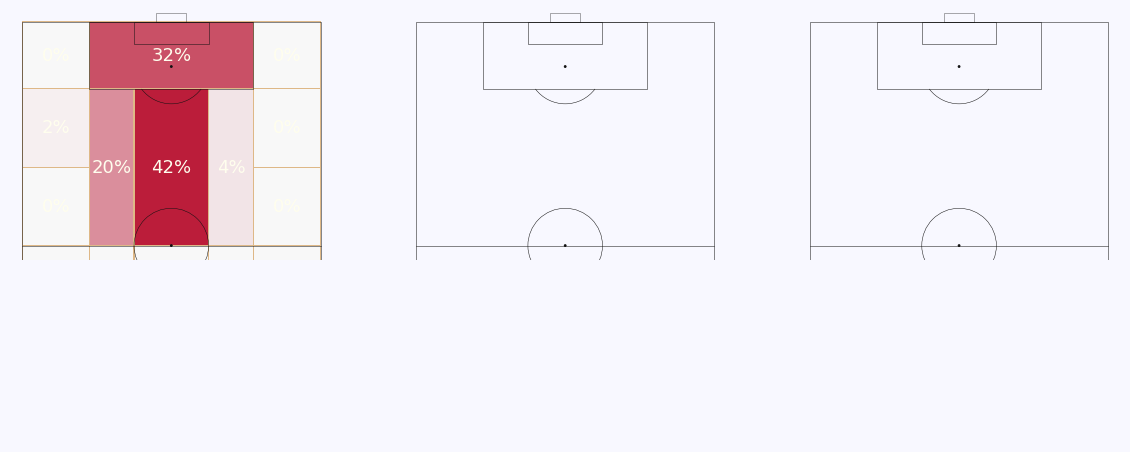

In [103]:
fig, axs = plt.subplots(1,3,figsize=(20,10),facecolor=figBackColor)
fig.set_facecolor(axBackColor)

axs = axs.ravel()

pitch = VerticalPitch(
    pitch_type='statsbomb',
    goal_type='box',
    pitch_color=axBackColor,
    line_color=textColor, 
#     figsize=(13.5,8),
    constrained_layout=True,
    tight_layout=False,
    line_zorder=1, 
    linewidth=0.5,
    half=True
)

pitch.draw(ax=axs[0])
pitch.draw(ax=axs[1])
pitch.draw(ax=axs[2])



cou = sdf[sdf["player"].str.contains("Coutinho")]
x = cou['X']*120
y = cou['Y']*80


axs[0].invert_xaxis()
axs[1].invert_xaxis()


bin_statistic2 = pitch.bin_statistic_positional(x, y, statistic='count',
                                               positional='full', normalize=True)

pitch.heatmap_positional(bin_statistic2, ax=axs[0],
                         cmap=cmapB, edgecolors='#DEB887',alpha=1, linewidth=.05)

labels2 = pitch.label_heatmap(bin_statistic2, color=text_color, fontsize=18,
                             ax=axs[0], ha='center', va='center',
                             str_format='{:.0%}')

In [60]:
cou

,id,minute,result,X,Y,xG,player,h_a,player_id,situation,season,shotType,match_id,h_team,a_team,h_goals,a_goals,date,player_assisted,lastAction
20,113453.0,49.0,BlockedShot,0.797,0.626,0.046757,Philippe Coutinho,a,488.0,OpenPlay,2016.0,RightFoot,501.0,Chelsea,Liverpool,1.0,2.0,2016-09-16 23:00:00,Daniel Sturridge,Pass
22,113459.0,77.0,BlockedShot,0.864,0.416,0.106764,Philippe Coutinho,a,488.0,OpenPlay,2016.0,RightFoot,501.0,Chelsea,Liverpool,1.0,2.0,2016-09-16 23:00:00,Nathaniel Clyne,Pass
405,113781.0,8.0,BlockedShot,0.952,0.470,0.612911,Philippe Coutinho,h,488.0,OpenPlay,2016.0,RightFoot,516.0,Liverpool,Hull,5.0,1.0,2016-09-24 18:00:00,NaN,None
408,113784.0,28.0,BlockedShot,0.870,0.478,0.120516,Philippe Coutinho,h,488.0,OpenPlay,2016.0,RightFoot,516.0,Liverpool,Hull,5.0,1.0,2016-09-24 18:00:00,Sadio Mané,Pass
415,113791.0,43.0,SavedShot,0.776,0.522,0.052799,Philippe Coutinho,h,488.0,OpenPlay,2016.0,RightFoot,516.0,Liverpool,Hull,5.0,1.0,2016-09-24 18:00:00,Sadio Mané,Pass
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9206,115206.0,48.0,MissedShots,0.747,0.451,0.019499,Philippe Coutinho,h,488.0,OpenPlay,2016.0,RightFoot,2693.0,Liverpool,Watford,6.0,1.0,2016-11-06 18:15:00,Sadio Mané,Pass
9212,115218.0,85.0,MissedShots,0.843,0.527,0.110460,Philippe Coutinho,h,488.0,OpenPlay,2016.0,RightFoot,2693.0,Liverpool,Watford,6.0,1.0,2016-11-06 18:15:00,Nathaniel Clyne,Pass
9308,115616.0,32.0,MissedShots,0.729,0.633,0.014584,Philippe Coutinho,a,488.0,OpenPlay,2016.0,RightFoot,2698.0,Southampton,Liverpool,0.0,0.0,2016-11-19 19:00:00,Emre Can,Pass
9312,115620.0,48.0,MissedShots,0.885,0.573,0.115425,Philippe Coutinho,a,488.0,OpenPlay,2016.0,LeftFoot,2698.0,Southampton,Liverpool,0.0,0.0,2016-11-19 19:00:00,Roberto Firmino,Pass


In [140]:
106 *.35

37.099999999999994